In [1]:
import pandas as pd

df = pd.read_csv('interpro_results.csv')
df.fillna('N/A', inplace=True)

def shortify(s, go):
    while len(s) > 40:
        s = ' '.join(s.split(' ')[:-1]) + '...'
    
    if s == 'N/A':
        return 'N/A'
    else:
        return s + ' (' + go + ')'

df['biological_process_combined'] = df.apply(lambda row: ';'.join([f"{shortify(name, go)}" for go, name in zip(row['biological_process_go'].split(';'), row['biological_process_go_name'].split(';'))]), axis=1)
df['molecular_function_combined'] = df.apply(lambda row: ';'.join([f"{shortify(name, go)}" for go, name in zip(row['molecular_function_go'].split(';'), row['molecular_function_go_name'].split(';'))]), axis=1)
df['cellular_component_combined'] = df.apply(lambda row: ';'.join([f"{shortify(name, go)}" for go, name in zip(row['cellular_component_go'].split(';'), row['cellular_component_go_name'].split(';'))]), axis=1)

df

,species_name,prot_id,gene_id,biological_process_go,biological_process_go_name,molecular_function_go,molecular_function_go_name,cellular_component_go,cellular_component_go_name,domains,domain_locations,families,family_locations,superfamilies,superfamily_locations,targeting_guide,biological_process_combined,molecular_function_combined,cellular_component_combined
0,kluyveromyces_lactis_cds.fna,XP_451741.1,lcl|NC_006038.1_cds_XP_451741.1_696,N/A,N/A,GO:0003755,peptidyl-prolyl cis-trans isomerase activity,GO:0005730;GO:0000785,nucleolus;chromatin,PPIase_FKBP_dom;NPL,332-418;12-178,PPIase_Fpr3/Fpr4-like,2-418,PPIase_dom_sf,290-418,AGAGGAAGAGGAAGAGGAAG,N/A,peptidyl-prolyl cis-trans isomerase... (GO:000...,nucleolus (GO:0005730);chromatin (GO:0000785)
1,kluyveromyces_lactis_cds.fna,XP_453196.1,lcl|NC_006040.1_cds_XP_453196.1_2079,N/A,N/A,GO:0070628;GO:0061133,proteasome binding;endopeptidase activator act...,GO:0005737;GO:0008541;GO:0005634,"cytoplasm;proteasome regulatory particle, lid ...",Rpn13/ADRM1_Pru,40-169,Rpn13/ADRM1,43-193,Rpn13/ADRM1_Pru_sf,45-138,AGAGGAAGAGGAAGAGGAAG,N/A,proteasome binding (GO:0070628);endopeptidase ...,cytoplasm (GO:0005737);proteasome regulatory p...
2,kluyveromyces_lactis_cds.fna,XP_453248.1,lcl|NC_006040.1_cds_XP_453248.1_2129,GO:0006335;GO:0034080,DNA replication-dependent chromatin assembly;C...,GO:0042393;GO:0005515,histone binding;protein binding,GO:0005654,nucleoplasm,Tetratricopeptide_SHNi-TPR_dom,211-247,NASP-associated_protein,29-381,TPR-like_helical_dom_sf,20-321,AGAGGAAGAGGAAGAGGAAG,DNA replication-dependent chromatin... (GO:000...,histone binding (GO:0042393);protein binding (...,nucleoplasm (GO:0005654)
3,kluyveromyces_lactis_cds.fna,XP_453252.1,lcl|NC_006040.1_cds_XP_453252.1_2133,GO:0006616,SRP-dependent cotranslational protein targetin...,GO:0140662;GO:0005524,ATP-dependent protein folding chaperone;ATP bi...,GO:0005829;GO:0005886;GO:0005737;GO:0005634,cytosol;plasma membrane;cytoplasm;nucleus,N/A,N/A,Hsp_70_fam,4-566,ATPase_NBD;HSP70_peptide-bd_sf;HSP70_C_sf,1-185;383-537;538-609,GCTGGTGACACTCACTTGGG,SRP-dependent cotranslational protein... (GO:0...,ATP-dependent protein folding chaperone (GO:01...,cytosol (GO:0005829);plasma membrane (GO:00058...
4,kluyveromyces_lactis_cds.fna,XP_453981.1,lcl|NC_006041.1_cds_XP_453981.1_2815,N/A,N/A,N/A,N/A,N/A,N/A,WSC_carb-bd,18-104,N/A,N/A,N/A,N/A,AGAAGAGGAGGAGGAGGAGG,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,aplosporella_prunicola_cds.fna,XP_033397713.1,lcl|NW_022983540.1_cds_XP_033397713.1_5413,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,AGAAGAGGAGGAGGAGGAGG,N/A,N/A,N/A
4696,aplosporella_prunicola_cds.fna,XP_033401083.1,lcl|NW_022983532.1_cds_XP_033401083.1_1800,GO:0007017;GO:0000278;GO:0000226,microtubule-based process;mitotic cell cycle;m...,GO:0003924;GO:0005200;GO:0005525,GTPase activity;structural constituent of cyto...,GO:0005874;GO:0005737,microtubule;cytoplasm,Tubulin_FtsZ_GTPase;Tubulin/FtsZ_2-layer-sand-dom,3-211;261-381,Beta_tubulin;Tubulin,41-58|88-99|108-126|152-164|212-224|230-239|24...,Tubulin/FtsZ-like_C;Tub_FtsZ_C;Tubulin/FtsZ_GT...,263-373;244-429;1-243;374-443,GCTTTCTTGCATTGGTACAC,microtubule-based process (GO:0007017);mitotic...,GTPase activity (GO:0003924);structural consti...,microtubule (GO:0005874);cytoplasm (GO:0005737)
4697,aplosporella_prunicola_cds.fna,XP_033401625.1,lcl|NW_022983531.1_cds_XP_033401625.1_1234,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,AGAAGAGGAGGAGGAGGAGG,N/A,N/A,N/A
4698,aplosporella_prunicola_cds.fna,XP_033402011.1,lcl|NW_022983531.1_cds_XP_033402011.1_1622,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,AGAAGAGGAGGAGGAGGAGG,N/A,N/A,N/A


In [2]:
def pretify_plt(plt):
    # Removing top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.tick_params(axis='both', which='both', length=0, labelcolor=cblack)
    plt.margins(x=0)
    plt.grid(alpha=0.3, linestyle='--')
    
    return plt

def set_xmargin(ax, left=0.0, right=0.3):
    import numpy as np

    ax.set_xmargin(0)
    ax.autoscale_view()
    lim = ax.get_xlim()
    delta = np.diff(lim)
    left = lim[0] - delta * left
    right = lim[1] + delta * right
    ax.set_xlim(left, right)

def disable_ax_spines(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

cblack = '#262626'
cred = '#FE7070'
cgrey = '#ccc6c7'
cgreen = '#05B9A0'
cpurple = '#8B8EFF'

In [7]:
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 600

def draw_plot(guide, df_column_go, xlabel, ylabel, title, size, color='#FFADAD'):
    go_list = list()

    for go_term in df[df['targeting_guide'] == guide][df_column_go].tolist():
        if not isinstance(go_term, float):
            
            go_list.extend(go_term.split(';'))

    data = Counter(go_list)

    sorted_data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))

    fig, ax = plt.subplots(figsize=size)
    bars = ax.barh(list(sorted_data.keys())[::-1], list(sorted_data.values())[::-1], color=color)

    # Adding the values next to each bar
    for bar in bars:
        xval = bar.get_width()
        ax.text(xval + 1, bar.get_y() + bar.get_height()/2, int(xval), ha='left', va='center')

    ax.set_xlabel(xlabel, color=cblack)
    ax.set_ylabel(ylabel, color=cblack)
    ax.set_title(title, color=cblack)
    ax.grid(alpha=0.3, linestyle='--')
    ax.tick_params(axis='both', which='both', length=0, labelcolor=cblack)
    disable_ax_spines(ax)
    plt.margins(0.05, 0)
    plt.tight_layout()
    plt.show()

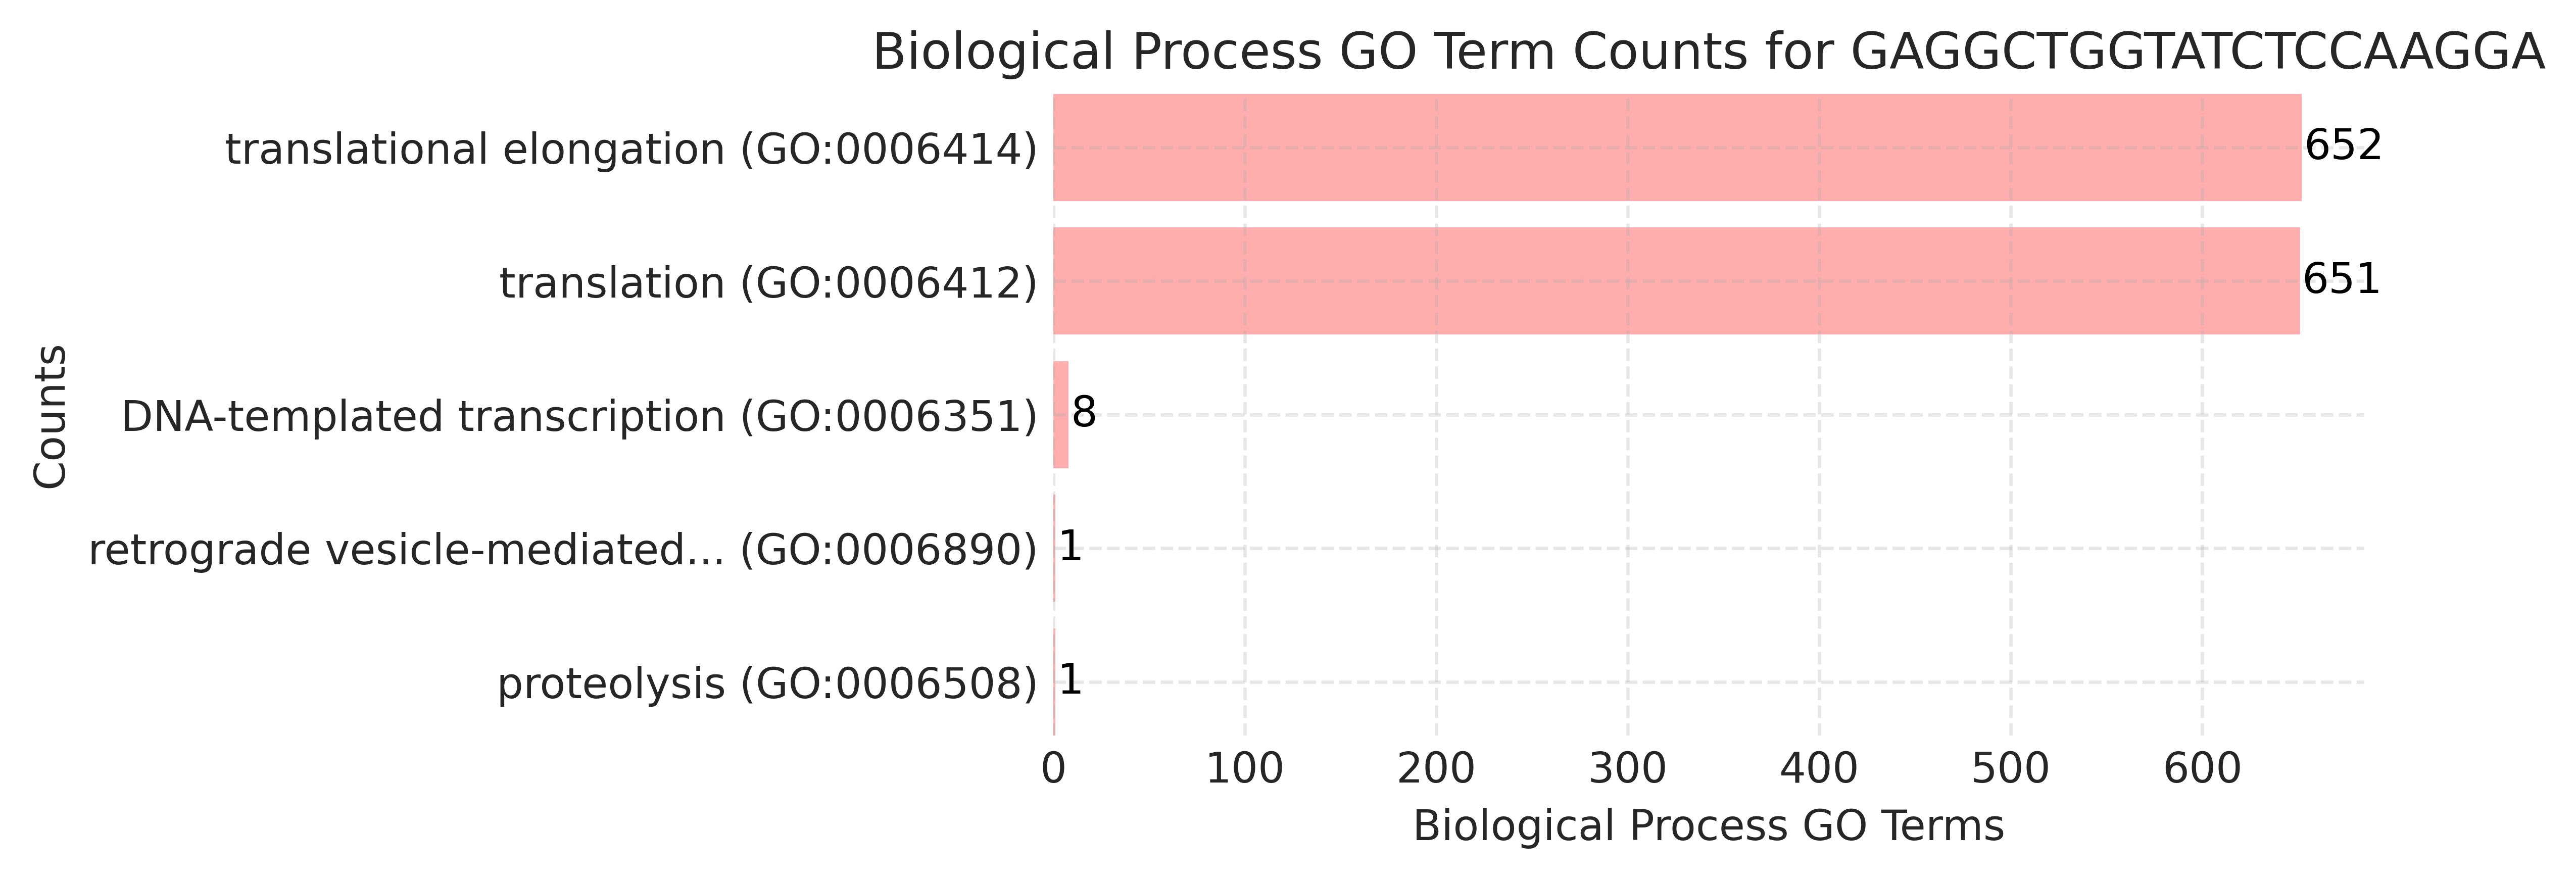

In [8]:
draw_plot('GAGGCTGGTATCTCCAAGGA',
          'biological_process_combined',
          'Biological Process GO Terms',
          'Counts',
          'Biological Process GO Term Counts for GAGGCTGGTATCTCCAAGGA',
          (8, 3))

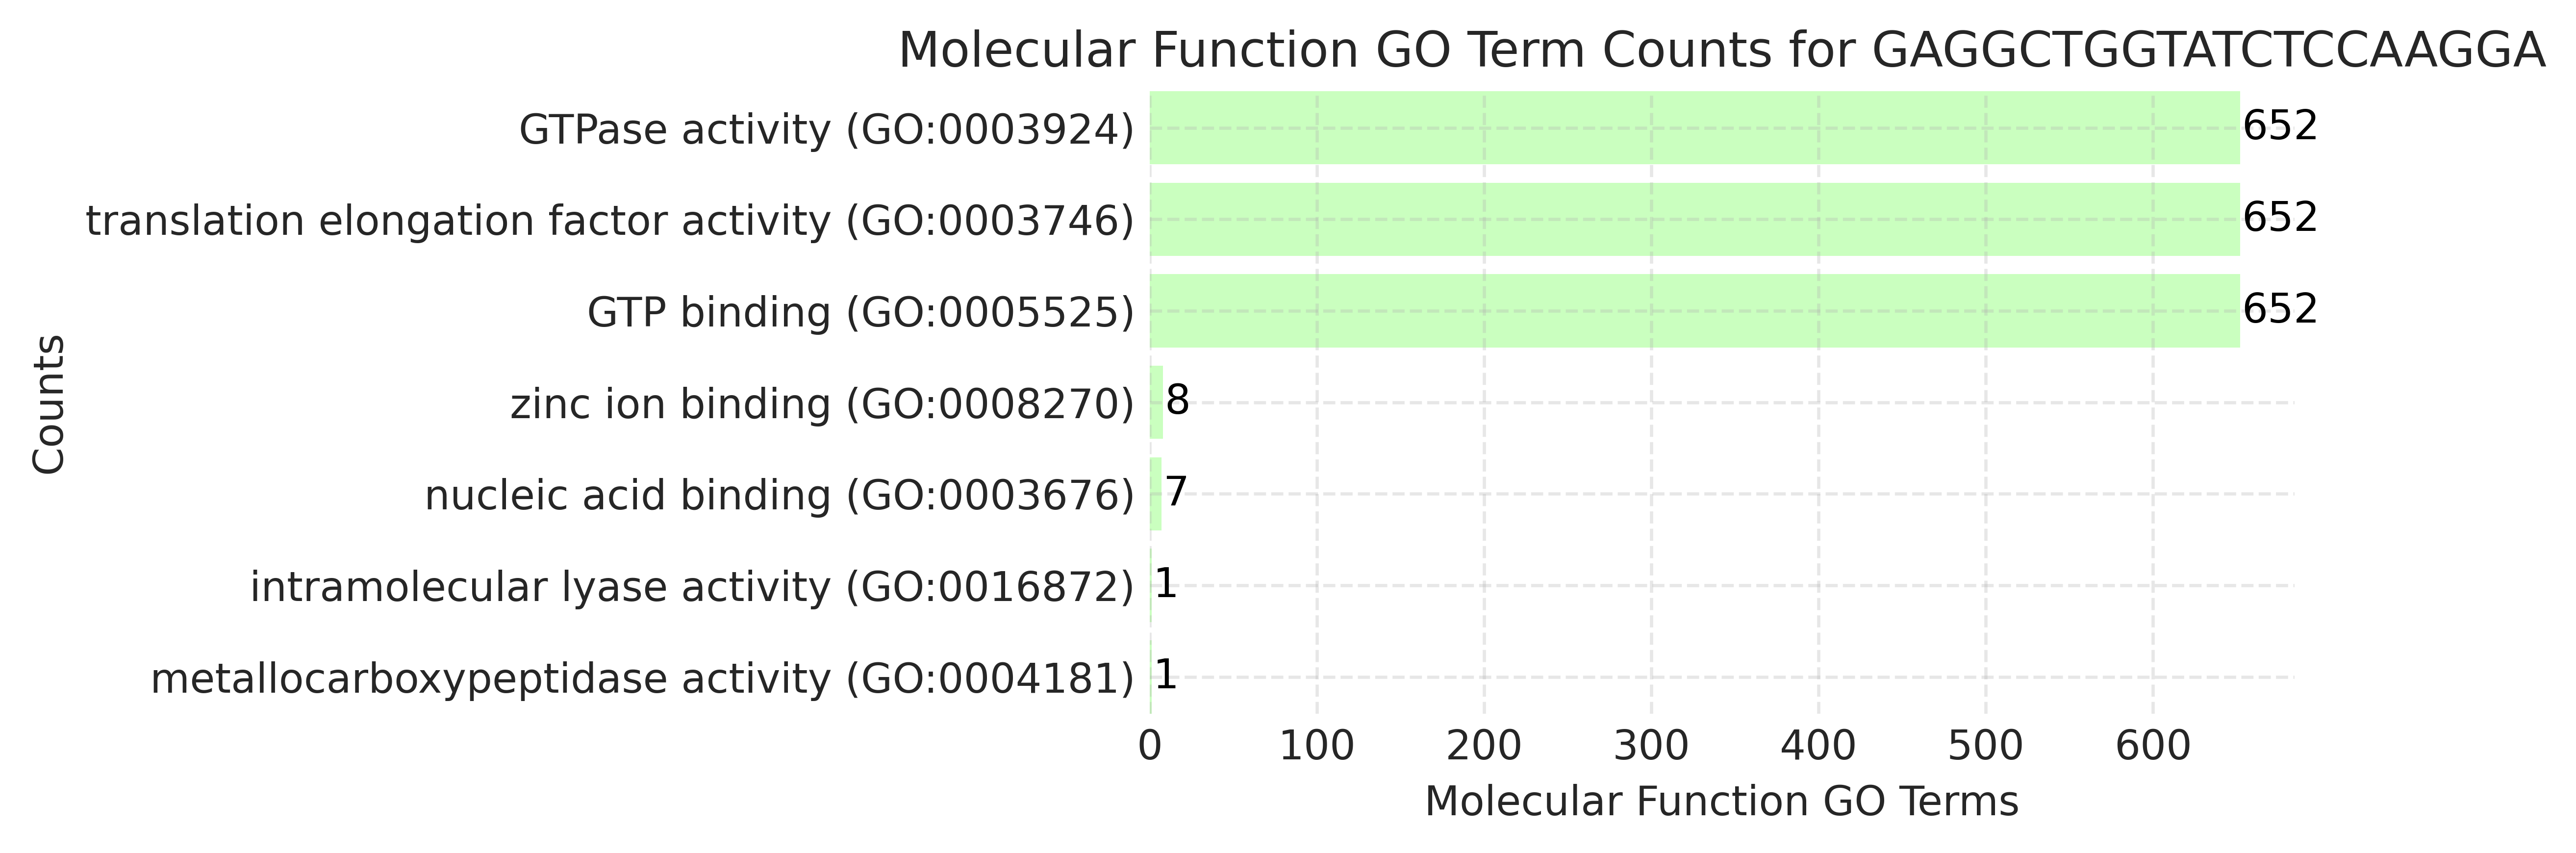

In [10]:
draw_plot('GAGGCTGGTATCTCCAAGGA',
          'molecular_function_combined',
          'Molecular Function GO Terms',
          'Counts',
          'Molecular Function GO Term Counts for GAGGCTGGTATCTCCAAGGA',
          (8, 3),
          '#CAFFBF')

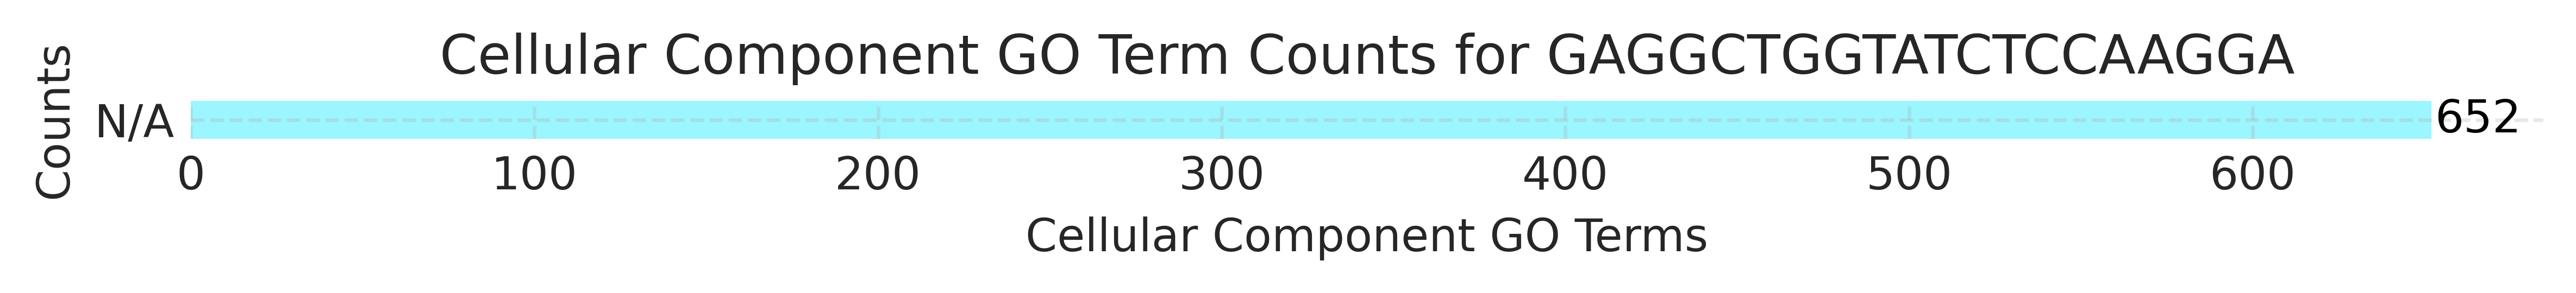

In [12]:
draw_plot('GAGGCTGGTATCTCCAAGGA',
          'cellular_component_combined',
          'Cellular Component GO Terms',
          'Counts',
          'Cellular Component GO Term Counts for GAGGCTGGTATCTCCAAGGA',
          (8, 1),
          '#9BF6FF')

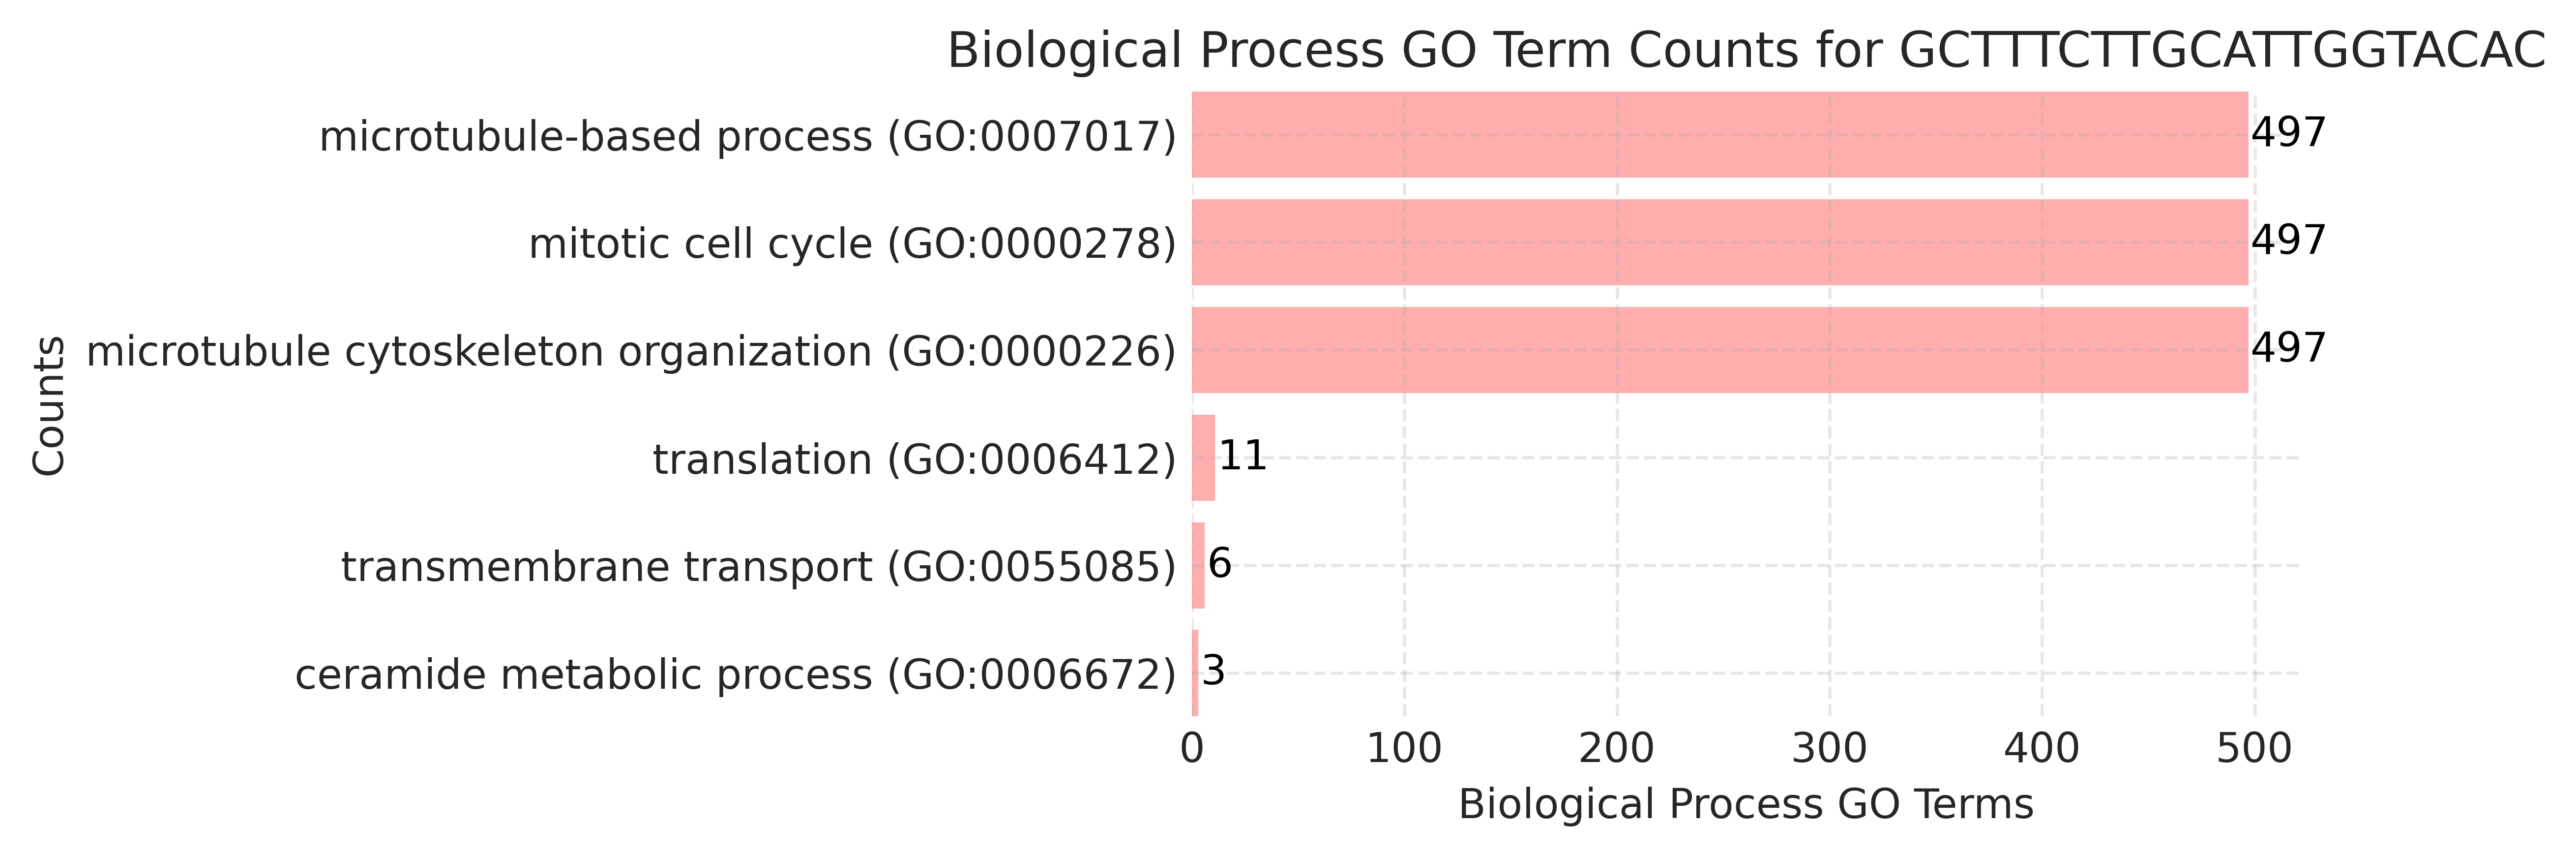

In [13]:
draw_plot('GCTTTCTTGCATTGGTACAC',
          'biological_process_combined',
          'Biological Process GO Terms',
          'Counts',
          'Biological Process GO Term Counts for GCTTTCTTGCATTGGTACAC',
          (8, 3))

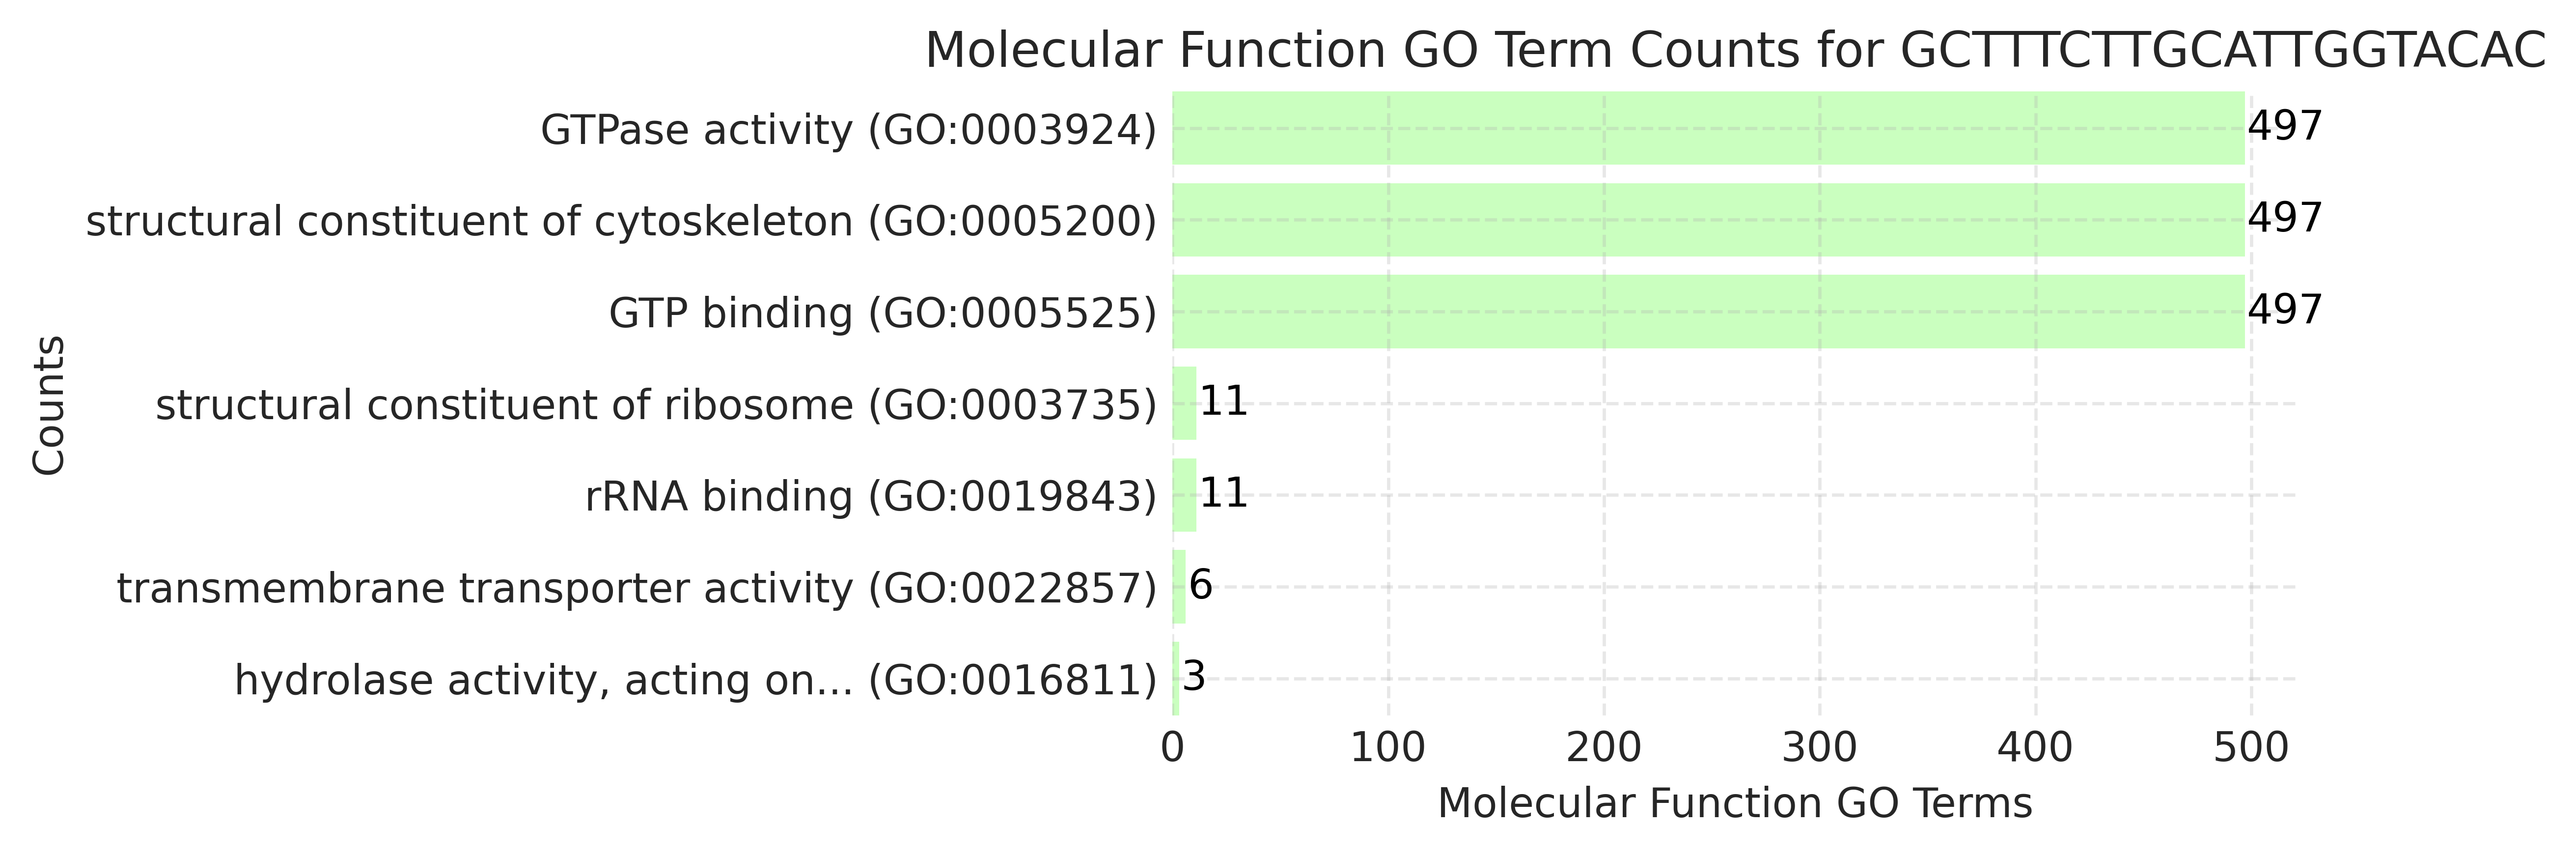

In [14]:
draw_plot('GCTTTCTTGCATTGGTACAC',
          'molecular_function_combined',
          'Molecular Function GO Terms',
          'Counts',
          'Molecular Function GO Term Counts for GCTTTCTTGCATTGGTACAC',
          (8, 3),
          '#CAFFBF')

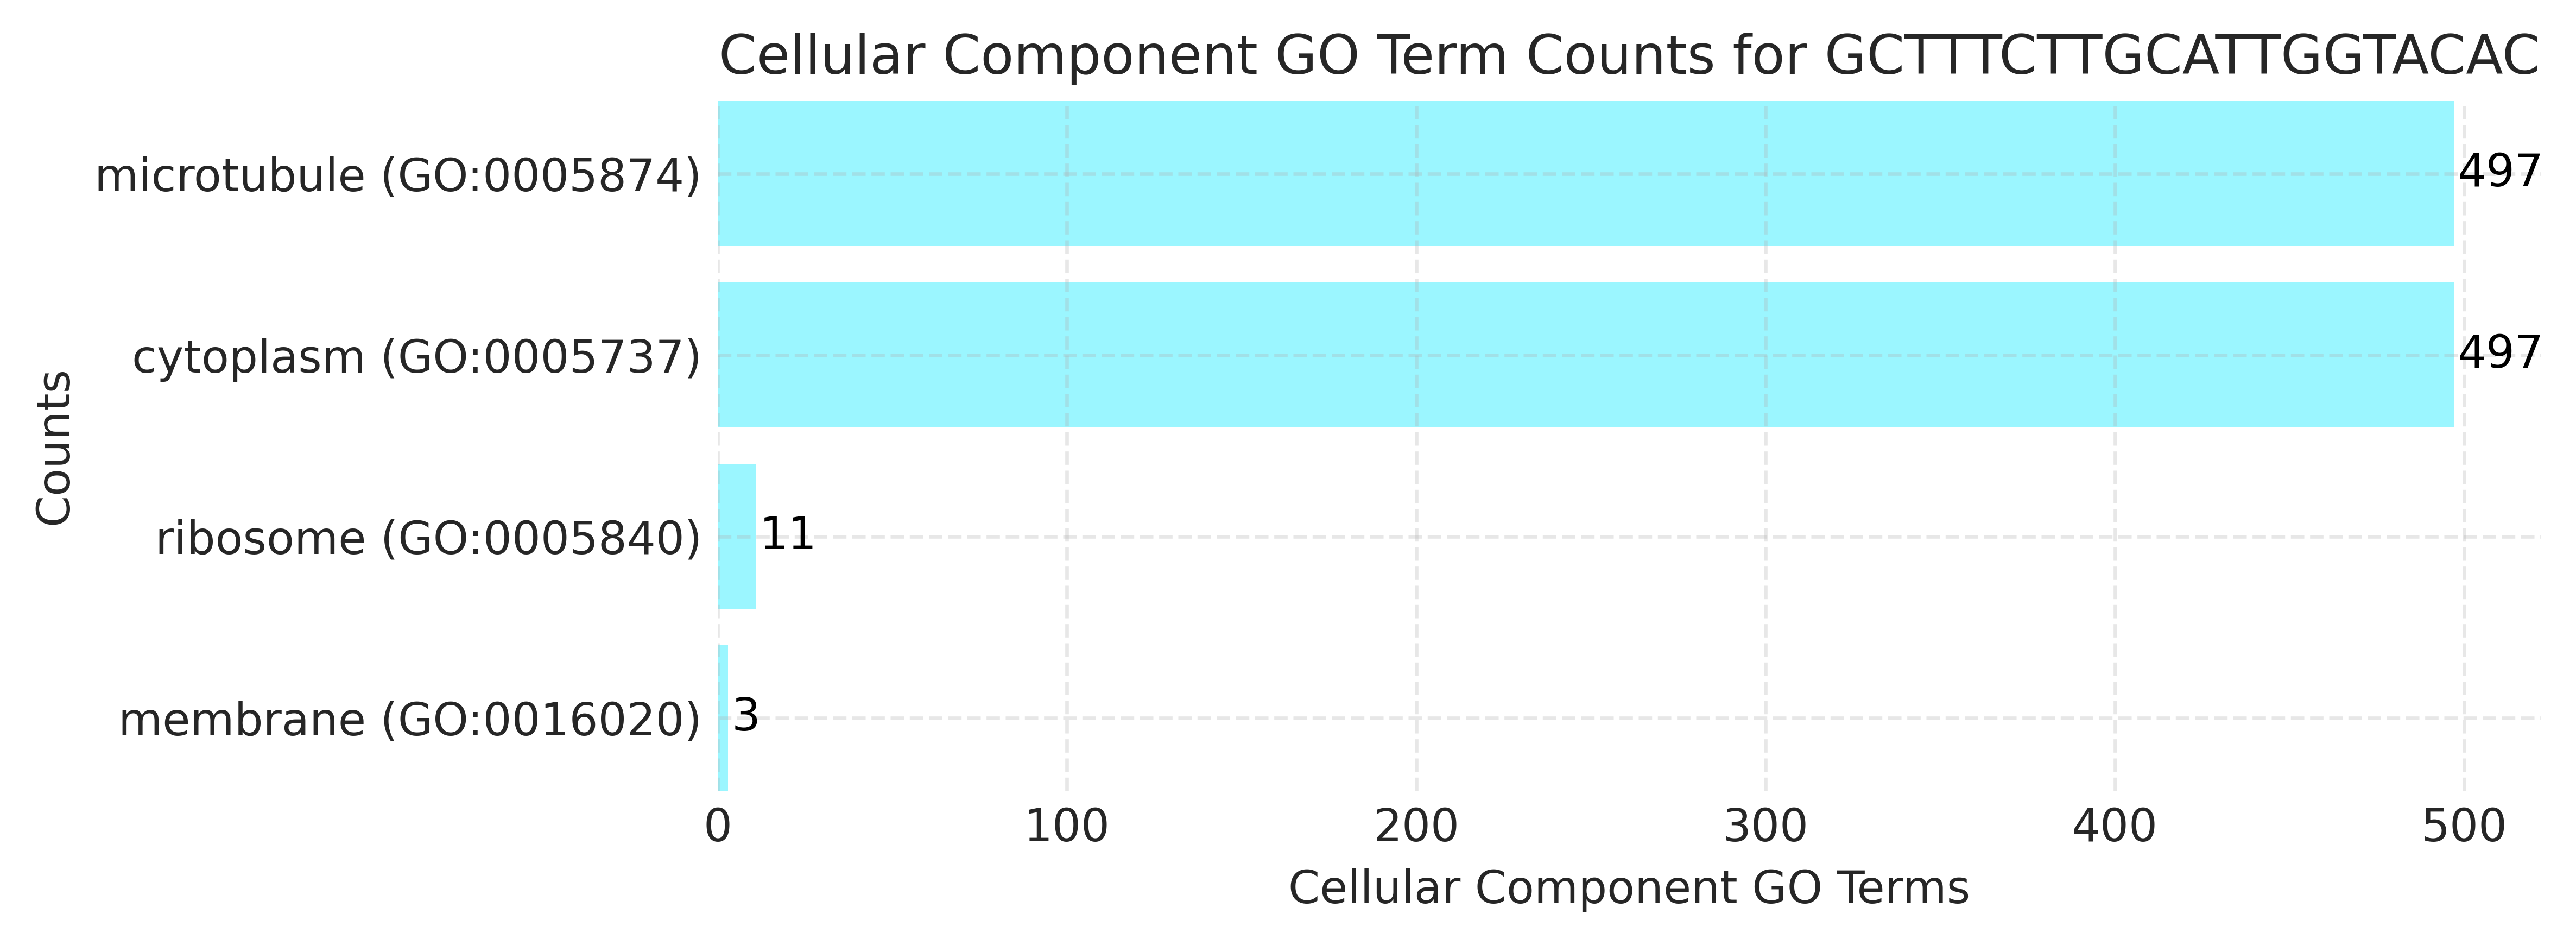

In [16]:
draw_plot('GCTTTCTTGCATTGGTACAC',
          'cellular_component_combined',
          'Cellular Component GO Terms',
          'Counts',
          'Cellular Component GO Term Counts for GCTTTCTTGCATTGGTACAC',
          (8, 3),
          '#9BF6FF')